# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to apply the concepts associated with Frequentist inference in Python. In particular, writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

Previously, we used only data from a known normal distribution. **We will now examine real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

We will assume the observations are the result of random sampling from our single hospital. We introduced the Central Limit Theorem (CLT) in part A, and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Hypothesis testing is very much based on making inferences about such sample statistics. We will rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

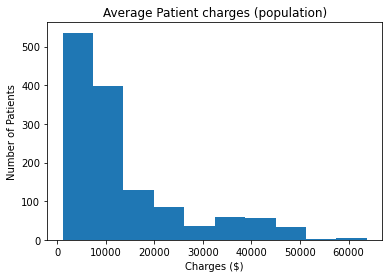

In [10]:
plt.hist(x = medical.charges)
plt.xlabel('Charges ($)')
plt.ylabel('Number of Patients')
plt.title('Average Patient charges (population)')
plt.show()

In [21]:
print("The mean for the population hospital charges is: ${:.2f}".format(np.mean(medical.charges)))
print("The standard deviation for the population hospital charges is: ${:.2f}".format(np.std(medical.charges)))

The mean for the population hospital charges is: $13270.42
The standard deviation for the population hospital charges is: $12105.48


The standard deviation is large and the distribution is heavily skewed to the right.  

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__    Taking a look at the sample distribution:

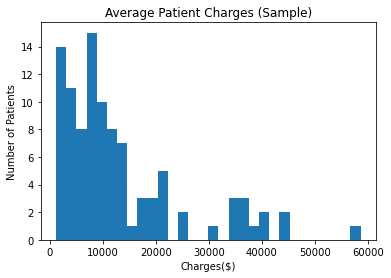

In [16]:
def samplizer(n):
    return np.random.choice(medical.charges, n)

sample = samplizer(100)

plt.hist(sample, bins=30)
plt.xlabel('Charges($)')
plt.ylabel('Number of Patients')
plt.title('Average Patient Charges (Sample)')
plt.show()

The sample population seems to follow a similar pattern to the population distribution but these distributions are certainly not normal.  One method that may be useful is to use bootsrapping to sample from the distribution many times with replacement and take the mean from the bootstrapped samples. We will keep the sample size at 100 and take 2000 bootstrapped samples.  

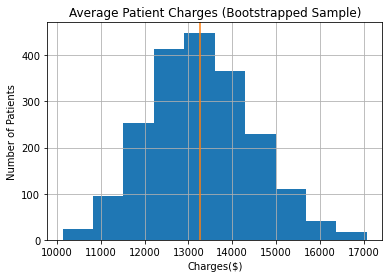

In [25]:
def bootstrapper(n):
    return pd.DataFrame({'bootmean':[medical.sample(n, replace = True).charges.mean() for i in range(2000)]})

b = bootstrapper(100)


b.bootmean.hist()
plt.xlabel('Charges($)')
plt.ylabel('Number of Patients')
plt.title('Average Patient Charges (Bootstrapped Sample)')
plt.axvline(medical.charges.mean(), color = 'C1')

In [26]:
print("The average patient cost of the bootstrapped sample is: ${:.2f}".format(b.bootmean.mean()))

The average patient cost of the bootstrapped sample is: $13294.51


Not only does the bootstrapped sample look normal, the average patient charge is above $12,000 indicating the mean will probably converge around this figure.  The hospital's operational model may not be in jeopardy, but it is still worth keeping an eye on.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  As stated before, the sample data is heavily right skewed.  This sample would have a one-sided confidence interval.

In [27]:
mean_pop = np.mean(medical.charges)

In [28]:
mean_sample = np.mean(medical.charges.sample(100, replace = True))
stdev = np.std(medical.charges.sample(100, replace = True))

In [34]:
t_stat = (mean_sample-mean_pop)/(stdev/np.sqrt(float(100)))

print("The t-statistic is: {0:.3f}".format(t_stat))

import statsmodels.stats.api as sms

ci = np.array(medical.charges.sample(100, replace = True))
print("The confidence interval of the bootstrapped sample is:")
sms.DescrStatsW(ci).tconfint_mean()

The t-statistic is: -0.212
The confidence interval of the bootstrapped sample is:


(10227.493645249158, 14986.282857550845)

Because the value of the t-statistic is somewhat close to zero, this is an indicator that the mean for the sample is not far off from the true population mean.  Based upon this confidence interval, the administrator may have a reason to be concerned as patient costs under $12000 are definitely in this range.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}


What assumption about the variances of the two groups are we making here?

__A:__  We will split the sample into two groups: Patients with insurance and patients without insurance.  This is called a two-sample t-Test.  We will have to make the assumptions that the variance between these two groups for the average cost per patient is not significantly different, randomly sampled from normal populations and that the data values are independent.  

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [35]:
insured = medical.query("insuranceclaim == 1")
uninsured = medical.query("insuranceclaim == 0")

mean_1 = np.mean(insured.charges.sample(100, replace=True))
std_1 = np.std(insured.charges.sample(100, replace = True))
n1 = len(insured)

mean_0 = np.mean(uninsured.charges.sample(100, replace = True))
std_0 = np.std(uninsured.charges.sample(100, replace = True))
n0 = len(uninsured)

In [36]:
# Calculating t-statistic and p-value with above formula

import math 

var1 = (n1 - 1)*(std_1**2)
var2 = (n0 - 1)*(std_0**2)
dof = n1 + n0 - 2

In [46]:
import scipy.stats

new_std = np.sqrt((var1 + var2)/dof)

_2side_t = (mean_1-mean_0)/(new_std * (np.sqrt(1/float(n1) + 1/float(n0))))

p = scipy.stats.t.sf(abs(_2side_t), df=dof)*2

print("The t-statistic for the two-sided t-Test is: {0:.3f}".format(_2side_t))

print("The p-value for the two-sided t-Test is: {0:.3f}".format(p))

The t-statistic for the two-sided t-Test is: 11.448
The p-value for the two-sided t-Test is: 0.000


In [43]:
# Calculating t-statistic and p-value using scipy.stats

from scipy import stats

stats1 = stats.norm.rvs(loc=mean_1,scale=std_1,size=len(insured))
stats2 = stats.norm.rvs(loc=mean_0,scale=std_0,size=len(uninsured))

stats.ttest_ind(stats1, stats2)

Ttest_indResult(statistic=10.677783623474228, pvalue=1.3468271455309612e-25)

The p-value is approaching zero for both methods meaning that the null hypothesis can be rejected. This means that there is a statistical difference between the average patient charges for insured and uninsured patients.  The t-statistic is not identical but very close and very large. This means that the average patient charges are far from the population mean. 

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  Yes:  scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate') - works with matrices and masked arrays but only returns the z-score.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test